In [1]:
import os
import utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from functools import partial

In [2]:
def read_all_results(dir_path):
    paths = os.listdir(dir_path)
    last_gens = []
    for i in range(len(paths)):
        path = dir_path + paths[i]
        try:
            last_gen = sorted(map(lambda x: x.split("_"), 
                            os.listdir(f"{path}/individuals/")), 
                            key=lambda x: int(x[1].split(".")[0]))[-1][-1][:-4]
            print(f"{i+1}: Path: {paths[i]}, last generation: {int(last_gen)}")
            last_gens.append(int(last_gen))
        except:
            continue
    return paths, last_gens

In [65]:
dir_path = "results/"
paths, last_gens = read_all_results(dir_path)

1: Path: GA_2021_06_02_20_16_16, last generation: 21
2: Path: GA_2021_06_02_20_15_07, last generation: 24
3: Path: GA_2021_06_02_20_15_55, last generation: 20
4: Path: GA_2021_06_02_20_16_06, last generation: 20
5: Path: GA_2021_06_02_20_15_19, last generation: 22
6: Path: GA_2021_06_02_20_16_37, last generation: 21
7: Path: GA_2021_06_02_20_16_25, last generation: 21
8: Path: GA_2021_06_02_20_15_34, last generation: 18


In [68]:
run = 8
path = dir_path + paths[run-1]
with open(path + "/run_params.json", "r") as file:
    print(file.read())
    file.close()

{
    "objective": "infected",
    "simulations": 15,
    "process": {
        "horizon": 74,
        "decision_period": 28,
        "policy": "weighted"
    },
    "population_size": 30,
    "random_individuals": false,
    "min_generations": 30
}


## Individual results

In [69]:
gen = 18
individuals_path =  f"{path}/individuals/individuals_{gen}.pkl"
individuals = utils.read_pickle(individuals_path)

In [70]:
ordinal = lambda n: "%d%s" % (n,"tsnrhtdd"[(n//10%10!=1)*(n%10<4)*n%10::4])
print("Strategy_count:")
print(f"{utils.tcolors.BOLD}{'#':<3} {'U':<5}{'D':<5}{'N':<5}{utils.tcolors.ENDC}")
for trend_count in range(6):
    strategy_count = individuals[0].strategy_count
    print(f"{trend_count+1:<2}| {strategy_count['U'][trend_count]:<5}{strategy_count['D'][trend_count]:<5}{strategy_count['N'][trend_count]:<5}")
print()
for ix, i in enumerate(sorted(individuals, key=lambda x: x.mean_score)):
    print(f"{utils.tcolors.BOLD}{ordinal(ix+1)} place:{utils.tcolors.ENDC}")
    print(f"ID: {i.ID}")
    print(f"Score: {np.round(i.mean_score, 3)}")
    print(f"Genes:\n{np.round(i.genes, 3)}")
    print()

Strategy_count:
#   U    D    N    
1 | 15   15   15   
2 | 10   15   15   
3 | 4    8    15   
4 | 0    4    13   
5 | 0    2    7    
6 | 0    0    2    

1st place:
ID: gen_17_002
Score: 115187.895
Genes:
[[[0.009 0.    0.588 0.37  0.033]
  [0.    0.    1.    0.    0.   ]
  [0.    0.    0.523 0.005 0.472]]

 [[0.    0.    1.    0.    0.   ]
  [0.    0.    0.5   0.    0.5  ]
  [0.    0.    0.466 0.534 0.   ]]

 [[1.    0.    0.    0.    0.   ]
  [0.    0.    1.    0.    0.   ]
  [0.    0.    0.721 0.173 0.106]]]

2nd place:
ID: gen_12_002
Score: 115263.816
Genes:
[[[0.039 0.    0.924 0.    0.037]
  [0.    0.    1.    0.    0.   ]
  [0.    0.    0.523 0.005 0.472]]

 [[0.    0.    1.    0.    0.   ]
  [0.    0.    1.    0.    0.   ]
  [0.    0.    0.466 0.534 0.   ]]

 [[0.079 0.    0.921 0.    0.   ]
  [0.    0.    1.    0.    0.   ]
  [0.    0.    0.721 0.173 0.106]]]

3rd place:
ID: gen_9_004
Score: 116169.532
Genes:
[[[0.009 0.    0.588 0.37  0.033]
  [0.    0.    1.    0.    0.  

In [71]:
genes = np.sum(individuals[0].genes, axis=(0,1))
norm = np.sum(genes)
norm_genes = np.divide(genes, norm)
print(norm_genes)

[0.11208944 0.         0.64424979 0.12021306 0.12344771]


## Generation Means

In [72]:
generation_scores = os.listdir(path+"/final_scores/")
final_scores = []
for score in sorted(generation_scores, key=lambda x: int(x.split("_")[2][:-4])):
    final_scores.append(utils.read_pickle(path+"/final_scores/"+score))

generation_means = defaultdict(list)
for gen_scores in final_scores:
    gen_individual_means = defaultdict(list)
    for individual in gen_scores.keys():
        for objective, scores in gen_scores[individual].items():
            gen_individual_means[objective].append(np.mean(scores))
    for objective, scores in gen_individual_means.items():
        generation_means[objective].append(np.mean(scores))
generation_means = dict(generation_means)
result_means = pd.DataFrame(generation_means)
result_means.index.rename("generation", inplace=True)
result_means

,deaths,infected,weighted,yll
generation,,,,
0,1286.240787,129431.632102,2580.557108,17214.028889
1,1283.388451,129028.356700,2573.672018,17163.002151
2,1281.277054,128684.842236,2568.125476,17120.818750
3,1279.233679,128335.847474,2562.592153,17078.012121
4,1276.821234,127983.442613,2556.655660,17034.486275
5,1274.903061,127703.562865,2551.938689,16998.108571
6,1273.203573,127426.372381,2547.467297,16963.492593
7,1271.152403,127130.951167,2542.461915,16926.129730
8,1269.428888,126888.365023,2538.312538,16894.835088


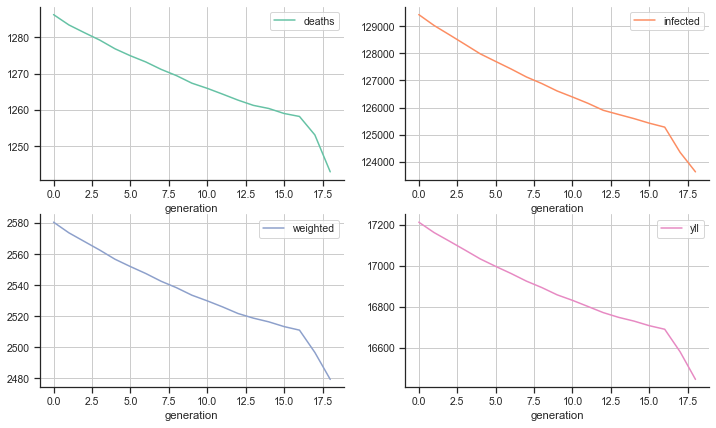

In [73]:
sns.set(font_scale=.95)
sns.set_style('ticks')
colors = sns.color_palette('Set2')
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(12,7))
for i, col in enumerate(result_means.columns):
    ax = axs[i//2][i%2]
    result_means[col].plot(label=col, color=colors[i], ax=ax)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend()
    ax.grid()
plt.show()

## Best individual

In [74]:
filenames = os.listdir(path+"/best_individuals/")
best_individuals = []
for individual in sorted(filenames, key=lambda x: int(x.split("_")[2][:-4])):
    best_individuals.append(utils.read_pickle(path+"/best_individuals/"+individual))

best_individual_scores = {gen: {"individual": None,"deaths":None, "infected":None, "weighted":None, "yll":None} for gen in range(len(best_individuals))}
for i, individual in enumerate(best_individuals):
    best_individual_scores[i]["individual"] = individual
    for obj in ["deaths", "infected", "weighted", "yll"]:
        best_individual_scores[i][obj] = np.mean(final_scores[i][individual.ID][obj])
results = pd.DataFrame(dict(best_individual_scores)).T
results.index.rename("generation", inplace=True)
results

,individual,deaths,infected,weighted,yll
generation,,,,,
0,gen_0_002,1236.293807,119170.819729,2428.002004,15977.266667
1,gen_1_006,1197.818377,116930.094651,2367.119324,15632.2
2,gen_1_006,1197.818377,116930.094651,2367.119324,15632.2
3,gen_1_006,1197.818377,116930.094651,2367.119324,15632.2
4,gen_4_010,1197.210561,116354.082222,2360.751383,15598.133333
5,gen_4_010,1197.210561,116354.082222,2360.751383,15598.133333
6,gen_4_010,1197.210561,116354.082222,2360.751383,15598.133333
7,gen_4_010,1197.210561,116354.082222,2360.751383,15598.133333
8,gen_4_010,1197.210561,116354.082222,2360.751383,15598.133333


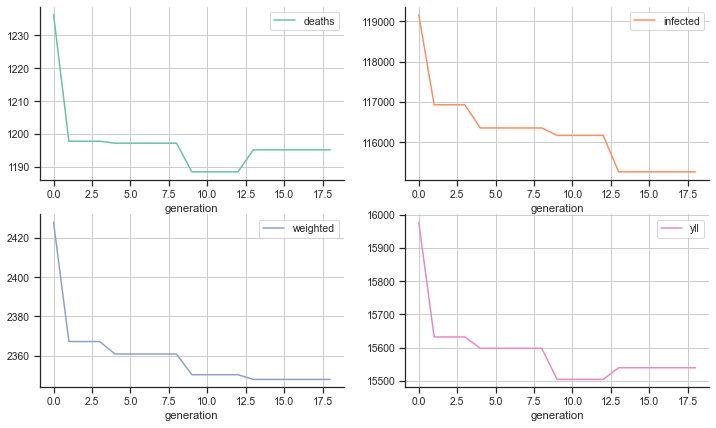

In [75]:
sns.set(font_scale=.95)
sns.set_style('ticks')
colors = sns.color_palette('Set2')
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(12,7))
for i, col in enumerate(results.columns[1:]):
    ax = axs[i//2][i%2]
    results[col].plot(label=col, color=colors[i], ax=ax)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend()
    ax.grid()
plt.show()